In [112]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

In [147]:
df = pd.read_csv("covid_vaccine_statewise.csv").reset_index()


In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7845 entries, 0 to 7844
Data columns (total 25 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   index                                7845 non-null   int64  
 1   Updated On                           7845 non-null   object 
 2   State                                7845 non-null   object 
 3   Total Doses Administered             7621 non-null   float64
 4   Sessions                             7621 non-null   float64
 5    Sites                               7621 non-null   float64
 6   First Dose Administered              7621 non-null   float64
 7   Second Dose Administered             7621 non-null   float64
 8   Male (Doses Administered)            7461 non-null   float64
 9   Female (Doses Administered)          7461 non-null   float64
 10  Transgender (Doses Administered)     7461 non-null   float64
 11   Covaxin (Doses Administered) 

In [150]:
df.head(5)

,index,Updated On,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
2,2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0
3,3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,81901.0,113613.0,11.0,195525.0
4,4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,98111.0,153145.0,24.0,251280.0


In [151]:
df.describe()

,index,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),Covaxin (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
count,7845.000000,7.621000e+03,7.621000e+03,7621.000000,7.621000e+03,7.621000e+03,7.461000e+03,7.461000e+03,7461.000000,7.621000e+03,...,1.702000e+03,1.702000e+03,1.702000e+03,3.733000e+03,3.734000e+03,3.734000e+03,1.600000e+02,1.600000e+02,160.000000,5.919000e+03
mean,3922.000000,9.188171e+06,4.792358e+05,2282.872064,7.414415e+06,1.773755e+06,3.620156e+06,3.168416e+06,1162.978019,1.044669e+06,...,8.773958e+06,7.442161e+06,5.641605e+06,1.395895e+06,2.916515e+06,2.627444e+06,4.461687e+07,3.951018e+07,12370.543750,4.547842e+06
std,2264.800764,3.746180e+07,1.911511e+06,7275.973730,2.995209e+07,7.570382e+06,1.737938e+07,1.515310e+07,5931.353995,4.452259e+06,...,2.660829e+07,2.225999e+07,1.681650e+07,5.501454e+06,9.567607e+06,8.192225e+06,3.950749e+07,3.417684e+07,12485.026753,1.834182e+07
min,0.000000,7.000000e+00,0.000000e+00,0.000000,7.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.000000,0.000000e+00,...,2.662400e+04,1.681500e+04,9.994000e+03,1.059000e+03,1.136000e+03,5.580000e+02,2.375700e+04,2.451700e+04,2.000000,7.000000e+00
25%,1961.000000,1.356570e+05,6.004000e+03,69.000000,1.166320e+05,1.283100e+04,5.655500e+04,5.210700e+04,8.000000,0.000000e+00,...,4.344842e+05,2.326275e+05,1.285605e+05,5.655400e+04,9.248225e+04,5.615975e+04,5.739350e+06,5.023407e+06,1278.750000,7.427550e+04
50%,3922.000000,8.182020e+05,4.547000e+04,597.000000,6.614590e+05,1.388180e+05,3.897850e+05,3.342380e+05,113.000000,1.185100e+04,...,3.095970e+06,2.695938e+06,1.805696e+06,2.947270e+05,8.330395e+05,7.887425e+05,3.716590e+07,3.365402e+07,8007.500000,4.022880e+05
75%,5883.000000,6.625243e+06,3.428690e+05,1708.000000,5.387805e+06,1.166434e+06,2.735777e+06,2.561513e+06,800.000000,7.579300e+05,...,7.366241e+06,6.969726e+06,5.294763e+06,9.105160e+05,2.499280e+06,2.337874e+06,7.441663e+07,6.685368e+07,19851.000000,3.501562e+06
max,7844.000000,5.132284e+08,3.501031e+07,73933.000000,4.001504e+08,1.130780e+08,2.701636e+08,2.395186e+08,98275.000000,6.236742e+07,...,2.243304e+08,1.667575e+08,1.186927e+08,9.224315e+07,9.096888e+07,6.731098e+07,1.349420e+08,1.156684e+08,46462.000000,2.506569e+08


In [158]:
vaccine_df_by_State = df.groupby('State')['First Dose Administered'].sum().reset_index()
df.drop(df.index[df['State'] == "India"], inplace=True)



In [159]:
vaccine_df_by_State

,State,First Dose Administered
0,Andaman and Nicobar Islands,1.642585e+07
1,Andhra Pradesh,1.232861e+09
2,Arunachal Pradesh,4.900498e+07
3,Assam,5.856002e+08
4,Bihar,1.470503e+09
5,Chandigarh,4.470310e+07
6,Chhattisgarh,7.960029e+08
7,Dadra and Nagar Haveli and Daman and Diu,3.359506e+07
8,Delhi,6.243395e+08
9,Goa,7.599137e+07


<AxesSubplot:title={'center':'state wise'}, xlabel='State', ylabel='First Dose Administered'>

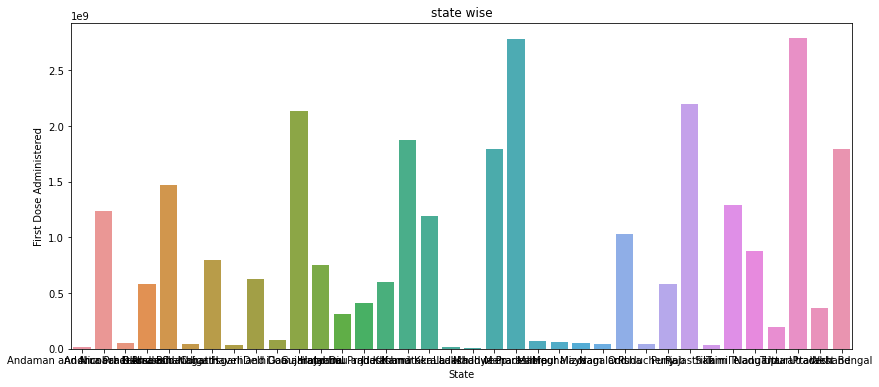

In [160]:
plt.figure(figsize=(14,6))

# Add title
plt.title("state wise")
# Line chart  
sns.barplot(x=vaccine_df_by_State["State"],y=vaccine_df_by_State["First Dose Administered"])

In [161]:
#. Number of persons state wise vaccinated for second dose in India
vaccine_df_by_State = df.groupby('State')['Second Dose Administered'].sum().reset_index()
df.drop(df.index[df['State'] == "India"], inplace=True)


In [162]:
vaccine_df_by_State

,State,Second Dose Administered
0,Andaman and Nicobar Islands,4118554.0
1,Andhra Pradesh,358817595.0
2,Arunachal Pradesh,11932317.0
3,Assam,130788792.0
4,Bihar,270790571.0
5,Chandigarh,11593735.0
6,Chhattisgarh,172120400.0
7,Dadra and Nagar Haveli and Daman and Diu,4594416.0
8,Delhi,188218946.0
9,Goa,16198174.0


<AxesSubplot:title={'center':'state wise'}, xlabel='State', ylabel='Second Dose Administered'>

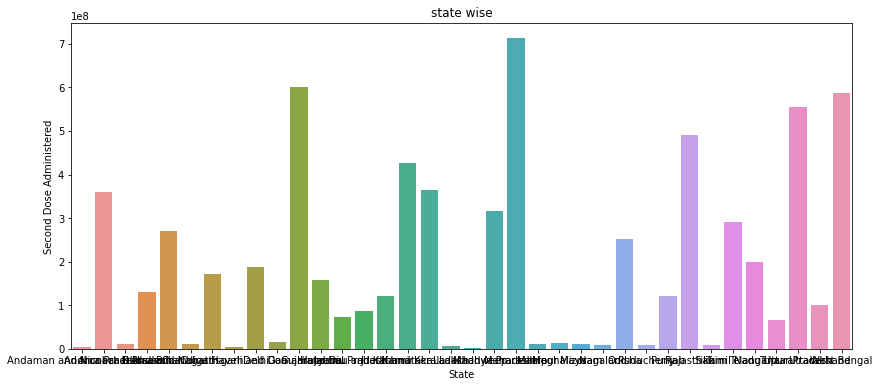

In [136]:
plt.figure(figsize=(14,6))

# Add title
plt.title("state wise")

# Line chart  
sns.barplot(x=vaccine_df_by_State["State"],y=vaccine_df_by_State["Second Dose Administered"])

In [174]:
df = pd.read_csv("covid_vaccine_statewise.csv").reset_index()


Text(0, 0.5, 'Male(Individuals Vaccinated)')

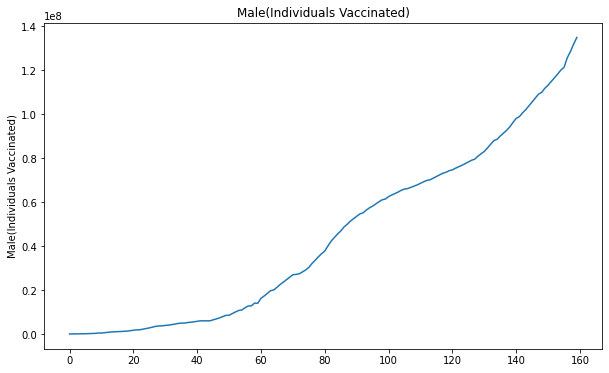

In [175]:
# No of males Vaccinated
plt.figure(figsize=(10,6))

# Add title
plt.title("Male(Individuals Vaccinated)")


sns.lineplot(x=df.index, y=df['Male(Individuals Vaccinated)'] )

# Add label for vertical axis
plt.ylabel("Male(Individuals Vaccinated)")

Text(0, 0.5, 'Female(Individuals Vaccinated)')

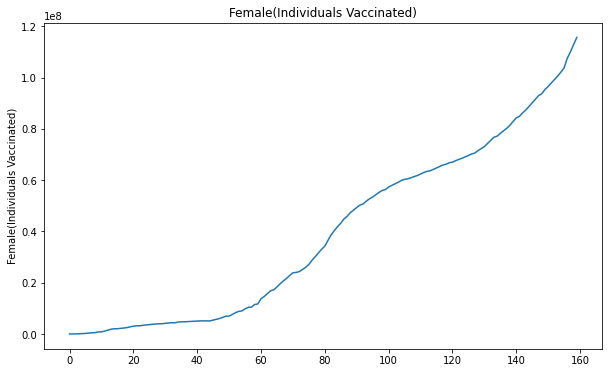

In [176]:
#No of Females Vaccinated
plt.figure(figsize=(10,6))

# Add title
plt.title("Female(Individuals Vaccinated)")


sns.lineplot(x=df.index, y=df['Female(Individuals Vaccinated)'] )

# Add label for vertical axis
plt.ylabel("Female(Individuals Vaccinated)")

In [177]:
df["Male(Individuals Vaccinated)"].sum()

7138698858.0

In [180]:
df["Female(Individuals Vaccinated)"].sum()

6321628736.0

<AxesSubplot:>

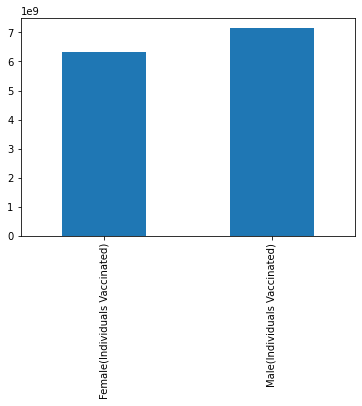

In [183]:
df[['Female(Individuals Vaccinated)','Male(Individuals Vaccinated)']].sum().plot.bar()